# Programming Assingment 4: Classification 

In this assignment you will train a binary classifier for predicting whether a patient's breast tumor is malignant or  benign. You will be provided a data set with tumor traits. This data set is available in scikit-learn.

Your task is to train and build a classifier  by following the steps below.

Implement all tasks in your notebook and submit your notebook ipynb file. 

## Task 1  (25 points)

**Task 1A**: Build a decision tree classifier by creating a single random training and testing dataset. Your training set should be 80% of your original sample set. Visualize your decision tree and report its accuracy on your testing dataset. (5 points)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy: 0.9649122807017544


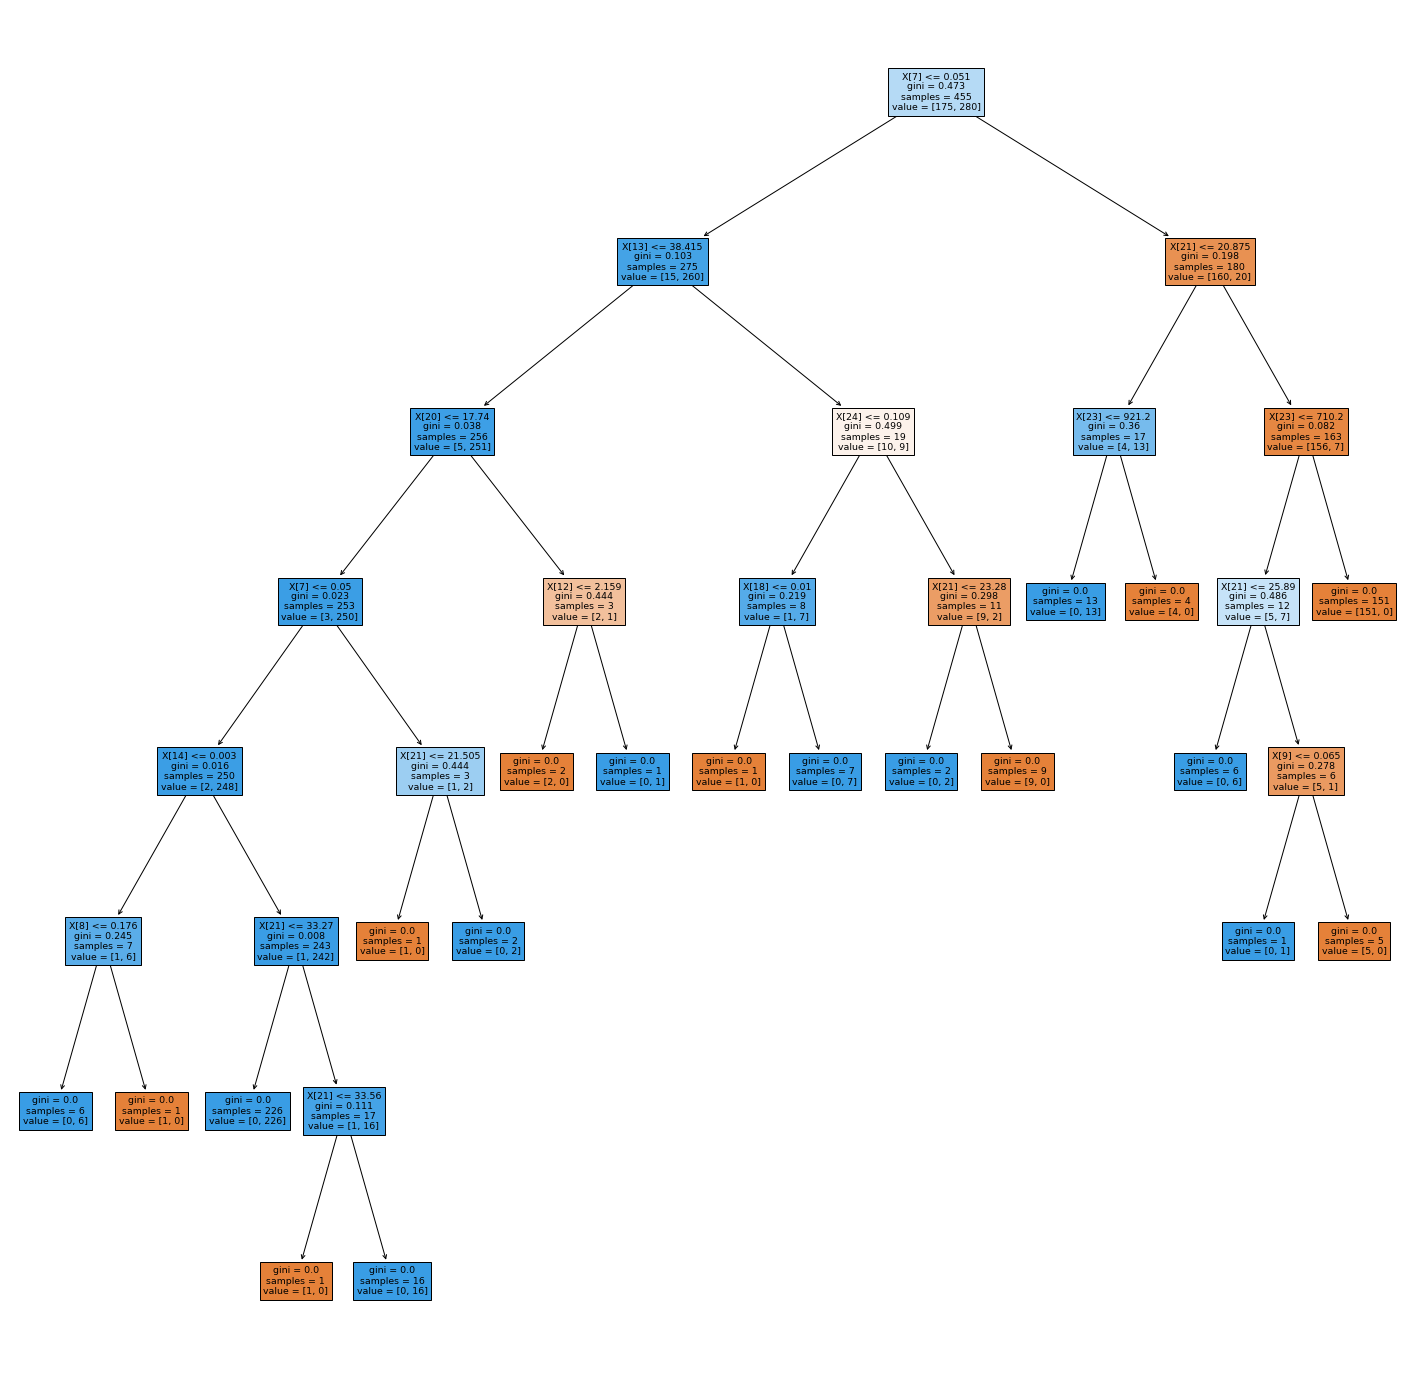

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(clf, filled=True)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


**Task 1.B:** Evaluate the performance of your classsifer over 10 random training/test sets (of equal size) and report all accuracy values you collected as well as the average accuracy. (15 points)


In [10]:
sum = 0
for i in range (10):
    X2=data.data
    y2=data.target
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ac = metrics.accuracy_score(y_test, y_pred)
    sum = sum + ac
    print("Accuracy #",i+1,": ",ac)
avg = sum/10
print("average accuracy:",avg)

Accuracy # 1 :  0.9298245614035088
Accuracy # 2 :  0.9649122807017544
Accuracy # 3 :  0.9649122807017544
Accuracy # 4 :  0.9649122807017544
Accuracy # 5 :  0.9649122807017544
Accuracy # 6 :  0.9385964912280702
Accuracy # 7 :  0.9649122807017544
Accuracy # 8 :  0.9473684210526315
Accuracy # 9 :  0.9649122807017544
Accuracy # 10 :  0.9649122807017544
average accuracy: 0.9570175438596493


**Task 1.C:** Compare the accuracy your observed with each of the two approaches (are they similar/different, how accuracy flunctuates, etc). (5points)

#### The accuracy of each of the approaches is around 0.95, which is very good. In the second approach, each time the data is split we are looking at different, random sets of the data. This randomness is why each of the 10 accuracy values are different, but only very slightly. They average out to around the same value as the first appraoch.


## Task 2 (25 points) 

**Task 2.A:** Perform 10-fold cross validation to explore how the max_depth and the min_samples parameter of your classifer affect its accuracy.  You are NOT allowed to use the grid search function for this task. You should try tree depths values ranging from 1 to 20 and min samples at leaf that range from 1 to 10. (10points, 5 for each parameter)


In [46]:
from sklearn import model_selection 
import numpy as np
 
kf = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 0)
 
tree_depth =np.arange(2,20,)
acc = np.zeros((10,18))
i=0
best_depth = -1
best_acc = -1
for train_index, val_index in kf.split(X_train):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    j=0
    for depth in tree_depth:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=depth)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        if acc[i][j]>best_acc:
            best_acc = acc[i][j]
            best_depth = depth
        j=j+1
    i=i+1
print("best depth: ", best_depth)
print("accuracy: ", acc.mean())

best_samples = -1
best_acc = -1
min_samples=np.arange(2,10,)
acc = np.zeros((10,8))
i=0
for train_index, val_index in kf.split(X_train):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    j=0
    for min_s in min_samples:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=min_s, max_depth=1)
        dt.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        if acc[i][j]>best_acc:
            best_acc = acc[i][j]
            best_samples = min_s
        j=j+1
    i=i+1
print("best min sample: ", best_samples)
print("accuracy: ", acc.mean())

best depth:  7
accuracy:  0.9013888888888889
best min sample:  2
accuracy:  0.9



**Task 2.B:** Plot 2 boxplot graphs  that show how each of these parameters affect the accuracy. (5 points each plot)


Mean accuracy: [0.87091503 0.87091503 0.87091503 0.87091503 0.87091503 0.87091503
 0.87091503 0.87091503]
Selected model index: 0


Text(0, 0.5, 'Accuracy')

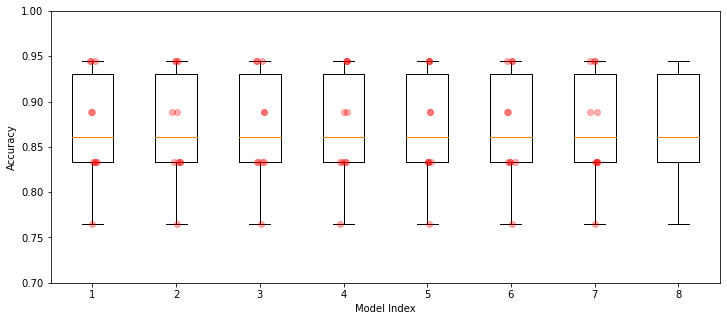

In [40]:
plt.boxplot(acc);
for i in range(7):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)

print('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
plt.ylim((0.7,1.0))

fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Model Index')
plt.ylabel('Accuracy')

Mean accuracy: [0.87091503 0.87091503 0.87091503 0.87091503 0.87091503 0.87091503
 0.87091503 0.87091503]
Selected model index: 0


Text(0, 0.5, 'Accuracy')

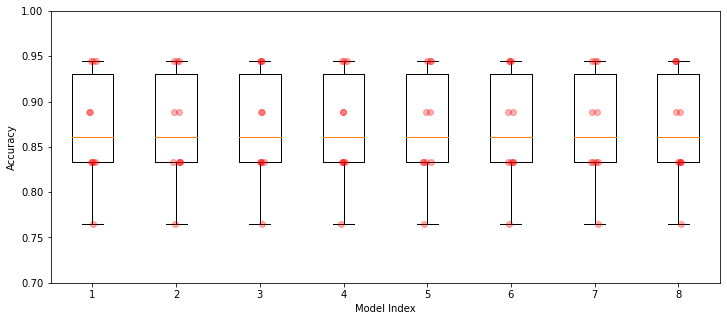

In [41]:
plt.boxplot(acc);
for i in range(8):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)

print('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
plt.ylim((0.7,1.))
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Model Index')
plt.ylabel('Accuracy')


**Task 2.C:** Use the training and testing set we provided to test the classifier with the best max_depth and min_samples_leaf parameters you discovered as well as classifier that use the default parameters for a decision tree. Which one is performing better in terms of accuracy? (5points)

In [53]:
train = pd.read_csv('train.csv')

In [54]:
x_train = train.iloc[:, 0:30]
y_train = train.iloc[:, 30:]

In [55]:
x_train_arr=x_train.iloc[:,:].values
y_train_arr = y_train.iloc[:,:].values

In [56]:
test = pd.read_csv('test.csv')

In [57]:
x_test = test.iloc[:, 0:30]
y_test = test.iloc[:, 30:]

In [58]:
x_test_arr=x_test.iloc[:,:].values
y_test_arr = y_test.iloc[:,:].values

In [64]:
clf0 = DecisionTreeClassifier()
clf0 = clf0.fit(x_train_arr,y_train_arr)

In [65]:
y_pred = clf0.predict(x_test)

In [66]:
print("Accuracy using default parameters for decision tree: ",metrics.accuracy_score(y_test_arr, y_pred))

Accuracy using default parameters for decision tree:  0.9298245614035088


In [67]:
clf1 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2) # values taken from task 2.B
clf1 = clf1.fit(x_train_arr,y_train_arr)
y_pred1 = clf1.predict(x_test_arr)
print("Accuracy using best parameters found from 2.B:",metrics.accuracy_score(y_test_arr, y_pred1))

Accuracy using best parameters found from 2.B: 0.9385964912280702


#### The model using the best parameters has a slightly better accuracy than the model using default parameters. (93.8 vs 92.9)

## Task 3 (25 points)

Perform a nested cross validation to explore how  different classification algorithms perform on this task. You should try random tree forest and kNN.  All of them could be validated through 5-fold validation and you should use the  grid search function available in sklearn for your internal cross validation. Discuss which classifier performed better. It is up to you which parameters you use in your grid search but keep in mind that the more parameter you use the longer the execution time. To help you TAs grading this part we ask that you restrict your exploration to a singe parameter per model. 

In [71]:
# note: this cell takes around 3 minutes to complete

from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = []
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(max_depth=2, random_state=47)
models.append(knn)
models.append(rf)
rf_params = {"max_features": ["sqrt", "log2"]}
knn_params = {"algorithm": ["ball_tree", "kd_tree"]}
nested_scores = np.zeros(10)

count = 0
for model in models:
    params = knn_params if count == 0 else rf_params
    for i in range(5):
        nested_cv = KFold(n_splits=5, shuffle=True, random_state=i)
        clf = GridSearchCV(estimator=model, param_grid=params, cv=nested_cv)
        clf.fit(x_train_arr,y_train_arr.ravel())
        nested_score = cross_val_score(clf, x_train_arr, y_train_arr.ravel(), cv=nested_cv)
        i = i + 5 if count == 1 else i 
        nested_scores[i] = nested_score.mean()
    count = count + 1
    
print(nested_scores[0:5].mean())
print(nested_scores[5:10].mean())

0.917802197802198
0.9432967032967033


## Task 4 (25 points)

Once you identify your best classifier, train it on the training set we provided and report the confusion matric, the recall and precision of it on the test set we provided.  You should also report  the F1-score.  The F1 score, commonly used in information retrieval, measures accuracy using the statistics precision *p* and recall *r*. The F1 score is given by:

$F1 = 2\frac{p \cdot r}{p+r}\ \ \mathrm{where}\ \ p = \frac{tp}{tp+fp},\ \ r = \frac{tp}{tp+fn}$

The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favored over extremely good performance on one and poor performance on the other.

In [72]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(max_depth=2, random_state=47)
rf = rf.fit(x_train_arr,y_train_arr.ravel())
y_pred = rf.predict(x_test_arr)
confusion_matrix(y_test_arr, y_pred)

array([[40,  3],
       [ 1, 70]])

In [73]:
from sklearn.metrics import recall_score
recall_score(y_test_arr, y_pred)

0.9859154929577465

In [74]:
from sklearn.metrics import precision_score
precision_score(y_test_arr, y_pred)

0.958904109589041

In [75]:
from sklearn.metrics import f1_score
f1_score(y_test_arr, y_pred)

0.9722222222222222